In [7]:
# Exoplanet_CNN.ipynb
# CNN-based binary classifier on full exoplanet light curves

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore', category=UserWarning,module='xgboost')

In [8]:
# --- Load and preprocess raw flux data ---
exoTrain = pd.read_csv("exoTrain.csv")
exoTest = pd.read_csv("exoTest.csv")

X_train = exoTrain.drop("LABEL", axis=1).values
y_train = (exoTrain["LABEL"].values - 1).astype(int)

X_test = exoTest.drop("LABEL", axis=1).values
y_test = (exoTest["LABEL"].values - 1).astype(int)

# --- Normalize inputs ---
X_train = X_train / np.max(np.abs(X_train), axis=1, keepdims=True)
X_test = X_test / np.max(np.abs(X_test), axis=1, keepdims=True)

# --- Reshape for CNN: (samples, time_steps, channels) ---
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
# --- Build CNN model ---
model = Sequential([
    Conv1D(32, kernel_size=7, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 3191, 32)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3191, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1595, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1591, 64)       │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1591, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 795, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 793, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 793, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 396, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50688)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50688)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,244,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,280,321 (12.51 MB)

 Trainable params: 3,279,873 (12.51 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - accuracy: 0.7531 - loss: 63.8154 - val_accuracy: 0.0000e+00 - val_loss: 84.8147
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.8815 - loss: 1.3231 - val_accuracy: 0.0000e+00 - val_loss: 113.7295
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.9393 - loss: 0.5077 - val_accuracy: 0.0000e+00 - val_loss: 112.0445
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.9587 - loss: 0.2311 - val_accuracy: 0.0000e+00 - val_loss: 96.9824
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.9713 - loss: 0.1213 - val_accuracy: 9.8232e-04 - val_loss: 67.0379
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.9453 - loss: 0.5692 - val_accuracy: 0.0088 - val_loss: 29.5221
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.9945 - loss: 0.0487 - val_accuracy: 0.3399 - val_loss: 13.3049
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.

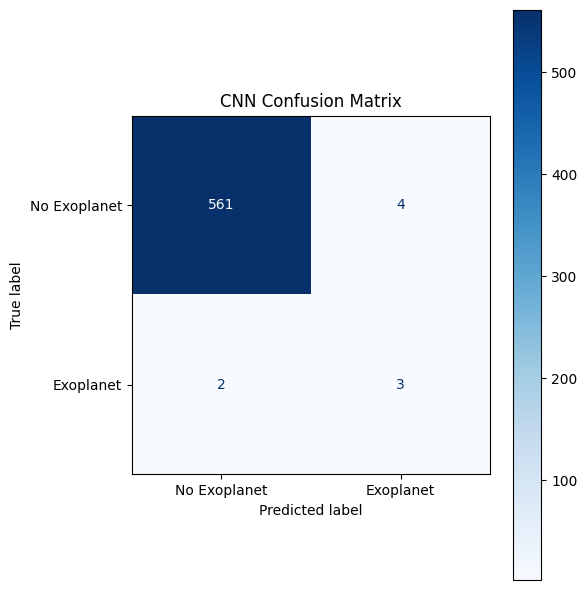

In [10]:
# --- Train ---
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                    validation_split=0.2, callbacks=[early_stop], verbose=1, class_weight={0: 1, 1: 100})

# --- Evaluate ---
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n--- CNN Classification Report ---")
print(classification_report(y_test, y_pred, target_names=["No Exoplanet", "Exoplanet"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Exoplanet", "Exoplanet"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
ax.set_title("CNN Confusion Matrix")
plt.tight_layout()
plt.show()

/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 3191, 32)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 3191, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 1595, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 1591, 64)       │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 1591, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 795, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 793, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 793, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 396, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50688)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50688)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     3,244,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,280,321 (12.51 MB)

 Trainable params: 3,279,873 (12.51 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.9392 - auc: 0.4534 - loss: 33.1314 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 1095.9308 - val_recall: 0.0000e+00
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.9910 - auc: 0.4923 - loss: 24.0074 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 1095.9308 - val_recall: 0.0000e+00
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.9910 - auc: 0.5000 - loss: 22.2751 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 1095.9308 - val_recall: 0.0000e+00
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.9927 - auc: 0.4923 - loss: 15.9468 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 1095.9308 - val_recall: 0.0000e+00
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.9887 - auc: 0.5000 - loss: 24.7400 - recall: 0.0000e+00 -

/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

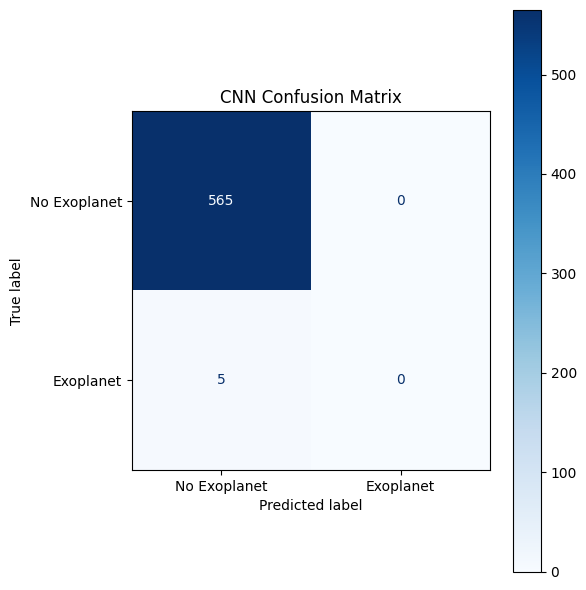


False Negatives: 5


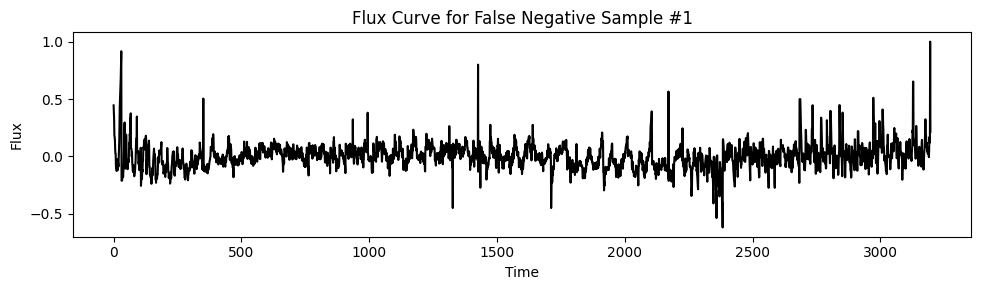

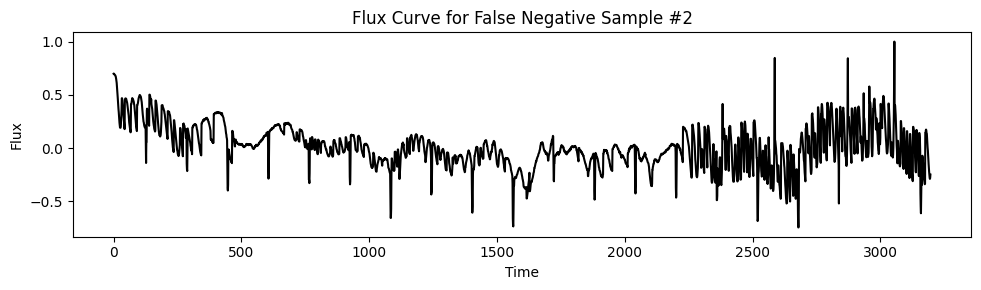

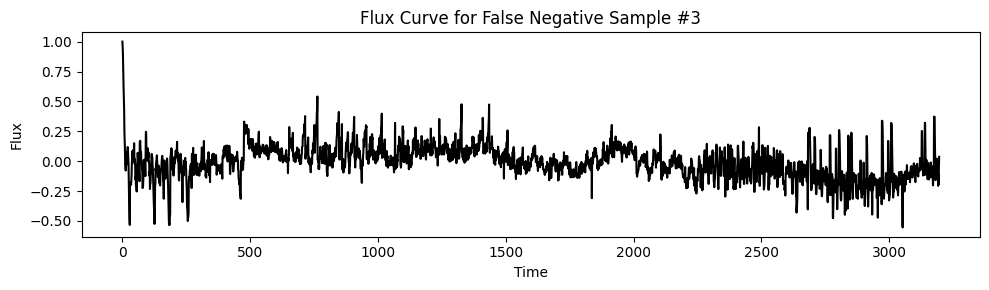

In [17]:
# Exoplanet_CNN.ipynb
# CNN-based binary classifier on full exoplanet light curves

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

# --- Load and preprocess raw flux data ---
exoTrain = pd.read_csv("exoTrain.csv")
exoTest = pd.read_csv("exoTest.csv")

X_train = exoTrain.drop("LABEL", axis=1).values
y_train = (exoTrain["LABEL"].values - 1).astype(int)

X_test = exoTest.drop("LABEL", axis=1).values
y_test = (exoTest["LABEL"].values - 1).astype(int)

# --- Normalize inputs ---
X_train = X_train / np.max(np.abs(X_train), axis=1, keepdims=True)
X_test = X_test / np.max(np.abs(X_test), axis=1, keepdims=True)

# --- Reshape for CNN: (samples, time_steps, channels) ---
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# --- Compute class weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# --- Build CNN model ---
model = Sequential([
    Conv1D(32, kernel_size=7, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

from tensorflow.keras import backend as K

def weighted_focal_loss(alpha=0.25, gamma=2.):
    def loss(y_true, y_pred):
        y_true = K.cast(y_true, dtype=tf.float32)
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -alpha * K.pow(1. - pt, gamma) * K.log(pt)
        return K.mean(loss)
    return loss

model.compile(optimizer='adam', 
              loss=weighted_focal_loss(alpha=class_weight_dict[1], gamma=2), 
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
model.summary()

# --- Train ---
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                    validation_split=0.2, callbacks=[early_stop], verbose=1, 
                    class_weight=class_weight_dict)

# --- Evaluate ---
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n--- CNN Classification Report ---")
print(classification_report(y_test, y_pred, target_names=["No Exoplanet", "Exoplanet"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Exoplanet", "Exoplanet"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
ax.set_title("CNN Confusion Matrix")
plt.tight_layout()
plt.show()

# --- Visualize False Negatives ---
false_negatives = np.where((y_test == 1) & (y_pred == 0))[0]
print(f"\nFalse Negatives: {len(false_negatives)}")

for i, idx in enumerate(false_negatives):
    if i >= 3:  # Limit to first 3 for clarity
        break
    plt.figure(figsize=(10, 3))
    plt.plot(X_test[idx].squeeze(), color='black')
    plt.title(f"Flux Curve for False Negative Sample #{i+1}")
    plt.xlabel("Time")
    plt.ylabel("Flux")
    plt.tight_layout()
    plt.show()